<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Heat Map

In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
#Laden der Trainings- und Testdaten
df = np.load(file='exchange/hr_01_cleaned_train.pkl')

In [8]:
#Verschieben von hasLeftCompany an die erste Stelle, für eine bessere Visualisierung
front= df['hasLeftCompany']
df.drop(labels=['hasLeftCompany'], axis=1,inplace=True)
df.insert(0,'hasLeftCompany',front)

for col in ['workAccident', 'hasLeftCompany', 'gotPromotion']:
    df[col]=df[col].astype('int64')
    

## Correlation Matrix

,hasLeftCompany,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,workAccident,gotPromotion
hasLeftCompany,1.000000,-0.391908,0.001202,0.013832,0.056604,0.136329,-0.152778,-0.060197
satisfactionLevel,-0.391908,1.000000,0.107042,-0.133170,-0.014213,-0.098049,0.056156,0.024552
yearsSinceEvaluation,0.001202,0.107042,1.000000,0.352554,0.341156,0.128957,-0.009569,-0.001861
numberOfProjects,0.013832,-0.133170,0.352554,1.000000,0.413287,0.192153,-0.000835,-0.002054
averageMonthlyHours,0.056604,-0.014213,0.341156,0.413287,1.000000,0.124399,-0.011038,0.002317
yearsAtCompany,0.136329,-0.098049,0.128957,0.192153,0.124399,1.000000,-0.003406,0.071080
workAccident,-0.152778,0.056156,-0.009569,-0.000835,-0.011038,-0.003406,1.000000,0.045355
gotPromotion,-0.060197,0.024552,-0.001861,-0.002054,0.002317,0.071080,0.045355,1.000000


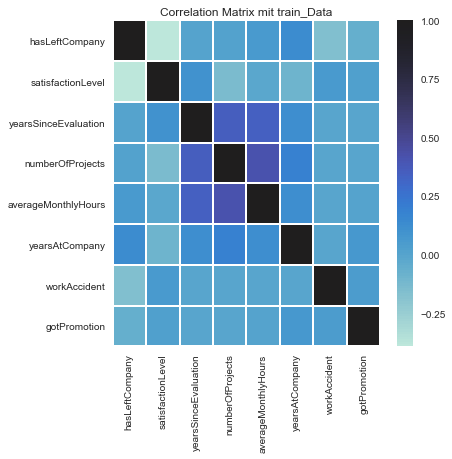

In [5]:
#Correlation Matrix mit train_Data
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
            linewidths=1, center =True).set_title('Correlation Matrix mit train_Data');
corr


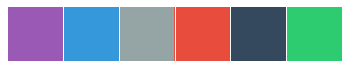

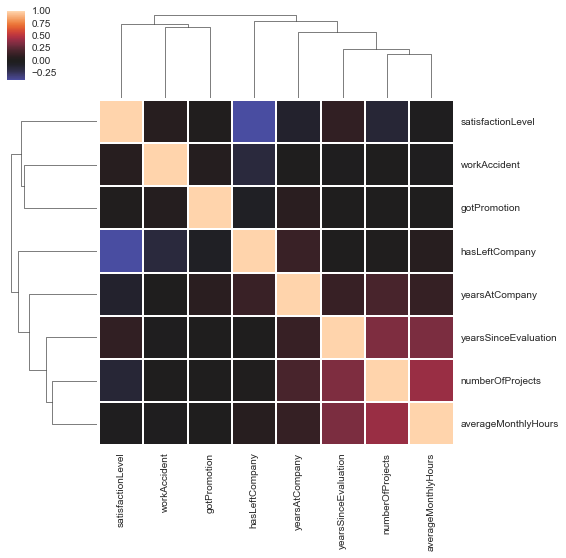

In [17]:
#Clustergrid mit train_Data
#sns.palplot(sns.color_palette("Set2", 10))

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
pal = sns.palplot(sns.color_palette(flatui))
sns.clustermap(df.corr(), center =0, cmap=pal,
                linewidths=1, figsize=(8, 8));

# Erstes Fazit
#### Höchste Correlation mit 0.413287 zwischen numberOfProjects und averageMonthlyHours
#####                         0.352554 yearsSinceEvaluation und numberOfProjects
####                         0.341156 yearsSinceEvaluation und averageMonthlyHours
#### -> Vermutung mehr Stunden und mehr Projekte steigert die Chance für eine Bewertung